<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Случайная-модель" data-toc-modified-id="Случайная-модель-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Случайная модель</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.0.4"><span class="toc-item-num">2.0.4&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Балансировка-методом-взвешивания-классов" data-toc-modified-id="Балансировка-методом-взвешивания-классов-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Балансировка методом взвешивания классов</a></span></li><li><span><a href="#Балансировка-методом-увеличения-выборки" data-toc-modified-id="Балансировка-методом-увеличения-выборки-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Балансировка методом увеличения выборки</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Построем модель с предельно большим значением *F1*-меры, дополнительно измерим *AUC-ROC*, сравнивая её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import (
    confusion_matrix,
    recall_score,
    precision_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

In [116]:
pd.options.mode.chained_assignment = None  # default='warn'

In [117]:
data = pd.read_csv('./datasets/Churn.csv')

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [119]:
data['Tenure'].value_counts(dropna=False)

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

В столбце Tenure присутствую пропуски. Заменим их на среднее значение по данному столбцу, округленное до целого.

In [120]:
data = data.dropna(subset=['Tenure'])

In [121]:
data['Tenure'].value_counts(dropna=False)

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

Проверим данные на наличие дубликатов

In [122]:
data.duplicated().sum()

0

Явных дубликатов в данных нет

In [123]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Столбцы RowNumber, CustomerId и Surname не несут в себе информацию, которая может быть полезна для алгоритма классификации, поэтому удалим эти столбцы из исходных данных

In [124]:
data = data.drop('Surname', axis=1)
data = data.drop('CustomerId', axis=1)
data = data.drop('RowNumber', axis=1)

display(data.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [125]:
target = data['Exited']
features = data.drop('Exited', axis=1)
print(features.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [126]:
display(features.shape)
display(target.shape)

(10000, 10)

(10000,)

In [127]:
TRAIN_RATIO = 0.60
TEST_RATIO = 0.20
VALIDATION_RATIO = 0.20

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=TEST_RATIO, random_state=12345)
features_train, features_valid, target_train, target_valid = train_test_split(features_train, target_train, test_size=VALIDATION_RATIO/(TRAIN_RATIO+TEST_RATIO), random_state=12345)

In [128]:
print(f'Размер обучающей выборки: {features_train.shape}')
print(f'Размер валидационной выборки: {features_valid.shape}')
print(f'Размер тестовой выборки: {features_test.shape}')

Размер обучающей выборки: (6000, 10)
Размер валидационной выборки: (2000, 10)
Размер тестовой выборки: (2000, 10)


In [129]:
print(f'Соотношение классов в тестовой выборке: {target_train.sum()/target_train.count()}')
print(f'Соотношение классов в тестовой выборке: {target_valid.sum()/target_valid.count()}')
print(f'Соотношение классов в тестовой выборке: {target_test.sum()/target_test.count()}')

Соотношение классов в тестовой выборке: 0.20316666666666666
Соотношение классов в тестовой выборке: 0.1955
Соотношение классов в тестовой выборке: 0.2135


Для более равномерного распределения классов в трех выборках, используем стратификацию

In [130]:
TRAIN_RATIO = 0.60
TEST_RATIO = 0.20
VALIDATION_RATIO = 0.20

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=TEST_RATIO, stratify=target, random_state=12345)
features_train, features_valid, target_train, target_valid = train_test_split(features_train, target_train, test_size=VALIDATION_RATIO/(TRAIN_RATIO+TEST_RATIO), stratify=target_train, random_state=12345)

In [131]:
print(f'Соотношение классов в тестовой выборке: {target_train.sum()/target_train.count()}')
print(f'Соотношение классов в тестовой выборке: {target_valid.sum()/target_valid.count()}')
print(f'Соотношение классов в тестовой выборке: {target_test.sum()/target_test.count()}')

Соотношение классов в тестовой выборке: 0.20383333333333334
Соотношение классов в тестовой выборке: 0.2035
Соотношение классов в тестовой выборке: 0.2035


Произведем нормальзацию числовых признаков с использованием StandardScaler

In [132]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [133]:
scaler = StandardScaler()
scaler.fit(features_train[numeric]) 

features_train_scaled = features_train.copy()
features_train_scaled[numeric] = scaler.transform(features_train[numeric])

features_valid_scaled = features_valid.copy()
features_valid_scaled[numeric] = scaler.transform(features_valid[numeric])

features_test_scaled = features_test.copy()
features_test_scaled[numeric] = scaler.transform(features_test[numeric])

Перед началом обучения моделей, произведем кодировку категориальных признаков в данных методом one-hot encoding

In [134]:
def encode_categorical_using_ohe(df_train, df_transform, columns):
    encoder_ohe = OneHotEncoder(drop='first', handle_unknown='error', sparse=False)
    encoder_ohe.fit(df_train[columns])
    transformed = encoder_ohe.transform(df_transform[columns])
    columns_encoded = [f'{col}_{cat}' for i, col in enumerate(columns) for cat in encoder_ohe.categories_[i][1:]]
    df_encoded = pd.DataFrame(transformed, columns=columns_encoded, index=df_transform.index)
    
    df_transform = df_transform.join(df_encoded)
    df_transform = df_transform.drop(columns, axis=1)
    
    return df_transform

In [135]:
categorical = ['Geography', 'Gender']

features_train_encoded = encode_categorical_using_ohe(features_train_scaled, features_train_scaled, categorical)
features_valid_encoded = encode_categorical_using_ohe(features_train_scaled, features_valid_scaled, categorical)
features_test_encoded = encode_categorical_using_ohe(features_train_scaled, features_test_scaled, categorical)
features_train_encoded.head()

/Users/alexeyr/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/alexeyr/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/alexeyr/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5536,-0.143332,0.577533,-0.700687,-1.220573,0.797767,1,1,1.029613,0.0,1.0,1.0
8530,1.632702,-0.564119,-1.046905,0.435807,-0.916018,1,0,0.237986,0.0,0.0,0.0
1762,1.116413,-0.468981,-1.393123,1.245822,-0.916018,1,1,-0.686104,0.0,0.0,0.0
9090,1.643028,0.006707,-0.008252,-1.220573,-0.916018,1,0,-0.391097,0.0,0.0,0.0
8777,-0.484083,-1.420358,-1.393123,1.421989,0.797767,1,0,-1.361559,0.0,1.0,1.0


**Мы загрузили данные из csv файла, заполнили отсутствующие значения и убедились, что в данных нет дубликатов, убрали из исходных данных три столбца, которые не понадобятся для обучения модели (фамилия клиента, номер клиента и порядковый номер), оставив все остальные столбцы, разбили все исходные данные на три выборки: тренировочная (60% от исходной выборки), валидационная (20% от исходной выборки) и тестовая (20% от исходной выборки) выборки и произвели масштабирование признаков. Категориальные признаки были закодированы методом one-hot encoding. Теперь исходные данные готовы к обучению моделей.**

## Исследование задачи

Определим вспомогательную функцию, которая выведет метрику F1-score для заданной модели на всех трех выборках

In [136]:
def evaluate_model(model, features_valid, target_valid):
    print(f"F1-score на валидационной выборке:", f1_score(target_valid, model.predict(features_valid)))
    
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    print(f'AUC ROC на валидационной выборке: {roc_auc_score(target_valid, probabilities_one_valid)}')

#### Случайная модель

Обучим случайную модель и посмотрим на метрику F1-score, мы будем использовать эти значения как базу для сравнения всех последующих моделей

In [137]:
dummy_model = DummyClassifier(strategy='uniform', random_state=12345)
dummy_model.fit(features_train_encoded, target_train)

evaluate_model(dummy_model, features_valid_encoded, target_valid)

F1-score на валидационной выборке: 0.30324400564174897
AUC ROC на валидационной выборке: 0.5


Случайная модель показывает точность на валидационной выборке по метрике F1-score в 30%, а по метрике AUC-ROC 0.5, как и ожидается для случайной модели

#### Логистическая регрессия

Обучим модель логистической регрессии и сравним ее показатели точности со случайной моделью

In [138]:
log_reg_model = LogisticRegression(solver='liblinear', random_state=12345) 
log_reg_model.fit(features_train_encoded, target_train)

evaluate_model(log_reg_model, features_valid_encoded, target_valid)

F1-score на валидационной выборке: 0.3214953271028037
AUC ROC на валидационной выборке: 0.7875086180170926


Модель логистической регрессии покатывает точность, не намного превышающую точность случайной модели

#### Дерево решений

Обучим дерево решений с перебором максимальной глубины дерева. Выберем наилучшую модель, сравнивая показатель F1-score на валидационной выборке.

In [139]:
best_dec_tree_model = None
best_depth = None
best_result = float('-inf')

for depth in range (1, 30):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train_encoded, target_train)
    predicted_valid = model.predict(features_valid_encoded)
    result = f1_score(predicted_valid, target_valid)
    if result > best_result:
        best_dec_tree_model = model 
        best_result = result
        best_depth = depth
        
print(f'Параметры лучшей модели: max_depth={best_depth}')
evaluate_model(best_dec_tree_model, features_valid_encoded, target_valid)

Параметры лучшей модели: max_depth=8
F1-score на валидационной выборке: 0.5838150289017341
AUC ROC на валидационной выборке: 0.8089707581233004


Наилучший показатель точности на валидационной выборке показала модель с максимальной глубиной в 8 - она показывает точность в 58% на тестовой выборке до балансировки классов

#### Случайный лес

Попробуем так же натренировать модель случайного леса с перебором двух гиперпараметров: количеством эстиматоров и максимальной глубиной

In [140]:
best_rand_forest_model = None
best_depth = None
best_est = None
best_result = 0

for est in range(20, 40):
    for depth in range (1, 20):
        model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345)
        model.fit(features_train_encoded, target_train)
        predicted_valid = model.predict(features_valid_encoded)
        result = f1_score(predicted_valid, target_valid)
        if result > best_result:
            best_rand_forest_model = model 
            best_result = result
            best_depth = depth
            best_est = est

print(f'Параметры лучшей модели: max_depth={best_depth} n_estimators={best_est}')
evaluate_model(best_rand_forest_model, features_valid_encoded, target_valid)

Параметры лучшей модели: max_depth=19 n_estimators=33
F1-score на валидационной выборке: 0.583963691376702
AUC ROC на валидационной выборке: 0.8459399306856934


Случайный лес с количеством эстиматоров в 32 и максимальной глубиной дерева в 15 показал наилучшую точность на валидационной выборке

**Итак, модель, показавшая наивысшую точность по метрике F1-score - случайный лес с максимальной глубиной дерева в 15 уровней и количеством эстиматоров 32. В дальнейшем в этом задании мы будем работать именно с этим классом моделей и постараемся достичь желаемой точности путем балансировки классов в исходных данных.**

## Борьба с дисбалансом

In [141]:
target_train.value_counts()

0    4777
1    1223
Name: Exited, dtype: int64

Из распределения значений целевой переменной мы видим, что в исходных данных присутствует сильный дисбаланс классов в пользу пользователей, которые не ушли из банка - они составляют примерно 80% от всех пользователей в исходном наборе данных. Балансировка классов должна помочь улучшить показатели точности классификатора.

#### Балансировка методом взвешивания классов

Попробуем решить проблему дисбаланса в исходных данных путем указания параметра `class_weight` при создании модели

In [142]:
best_rand_forest_model = None
best_depth = None
best_est = None
best_result = 0

for est in range(20, 40):
    for depth in range (1, 20):
        model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345, class_weight='balanced')
        model.fit(features_train_encoded, target_train)
        predicted_valid = model.predict(features_valid_encoded)
        result = f1_score(predicted_valid, target_valid)
        if result > best_result:
            best_rand_forest_model = model 
            best_result = result
            best_depth = depth
            best_est = est

print(f'Параметры лучшей модели: max_depth={best_depth} n_estimators={best_est}')
evaluate_model(best_rand_forest_model, features_valid_encoded, target_valid)

Параметры лучшей модели: max_depth=8 n_estimators=20
F1-score на валидационной выборке: 0.6432491767288694
AUC ROC на валидационной выборке: 0.8692004793699709


Точность модели на обучающей выборке выросла, а на валидационной выборке снизилась

#### Балансировка методом увеличения выборки

Попробуем второй подход к решению проблемы дисбаласа классов: продублируем записи в данных со значением целевой перемнной 1, т.е. те записи, которые недопредставленны в исходных данных

In [143]:
features_zeros = features_train_encoded[target_train == 0]
features_ones = features_train_encoded[target_train == 1]
target_zeros = target_train[target == 0]
target_ones = target_train[target == 1]

features_train_upsampled = pd.concat([features_zeros] + [features_ones] * 4)
target_train_upsampled = pd.concat([target_zeros] + [target_ones] * 4)

features_train_upsampled, target_train_upsampled = shuffle(features_train_upsampled, target_train_upsampled, random_state=12345)

In [144]:
target_train_upsampled.value_counts()

1    4892
0    4777
Name: Exited, dtype: int64

Мы видим, что после апсэмплинга в данных приблизительно одинаково часто встречаются записи со значением целевой переменной 1 и 0 - данные сбалансированы

In [149]:
best_model_balanced = None
best_depth = None
best_est = None
best_result = 0

for est in range(20, 40):
    for depth in range (1, 20):
        model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345)
        model.fit(features_train_upsampled, target_train_upsampled)
        predicted_valid = model.predict(features_valid_encoded)
        result = f1_score(predicted_valid, target_valid)
        if result > best_result:
            best_model_balanced = model 
            best_result = result
            best_depth = depth
            best_est = est

print(f'Параметры лучшей модели: max_depth={best_depth} n_estimators={best_est}')
evaluate_model(best_model_balanced, features_valid_encoded, target_valid)

Параметры лучшей модели: max_depth=12 n_estimators=27
F1-score на валидационной выборке: 0.6374407582938387
AUC ROC на валидационной выборке: 0.8603356823695808


"Ручная" балансировка данных дала больший прирост точности, чем автоматическая балансировка путем задания параметра `class_weight='balanced'`

**С помощью балансировки данных методом upsampling-а, т.е. увеличением количества записей в исходных данных так, чтобы достичь баланса значений целевой переменной, нам удалось достичь точности по метрике F1-score в 64% на валидационных данных.**

## Тестирование модели

In [151]:
predictions_test = best_model_balanced.predict(features_test_encoded)
print(f"F1-score на тестовой выборке:", f1_score(target_test, predictions_test))

F1-score на тестовой выборке: 0.6037735849056604


Точность наилучщей модели на тестовых данных - 60%, что выше требуемого показателя точности в 59%

In [153]:
def display_roc_curve(target, probabilities_one, title):
    fpr, tpr, thresholds = roc_curve(target, probabilities_one)

    plt.figure()
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.show()

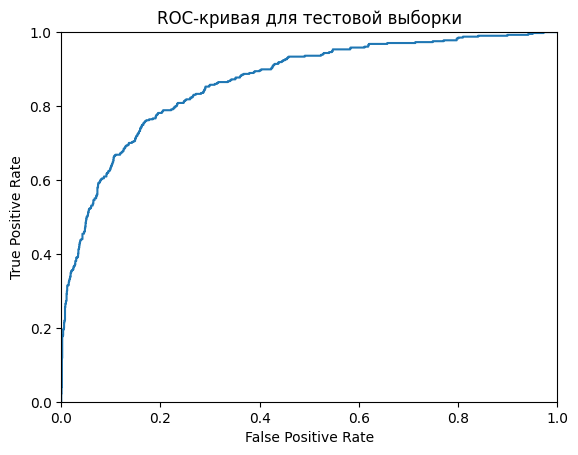

AUC ROC: 0.8664319172793749


In [154]:
probabilities_test = best_rand_forest_model.predict_proba(features_test_encoded)
probabilities_one_test = probabilities_test[:, 1]

display_roc_curve(target_test, probabilities_one_test, "ROC-кривая для тестовой выборки")
print(f'AUC ROC: {roc_auc_score(target_test, probabilities_one_test)}')

**Наилучшая модель показала точность в 60% по метрике F1-score, что соответствует желаемой точности. График кривой ROC поднят высоко над диагональю (0,0) - (1,1), это говорит о высоком значение TPR и хорошем качество обученной модели.**

## Выводы

В данной работе мы применили три класса моделей машинного обучения к задаче классификации клиенов банка для прогнозирования их оттока. Наилучшую точность в 61% по метрике F1-score показала модель дерева решений, что соответствует желаемой точности. Изначальная точность модели в 58% была увеличена за счет балансировки классов в исходных данных. Анализ кривой ROC и подсчет метрики AUC-ROC подтвердил качество обученной модели, модель показала значение 0.86 по метрике AUC-ROC на тестовых данных. Наилучие гиперпараметры модели: max_depth=8 n_estimators=20.